In [8]:
%matplotlib inline
from brian2 import * 
from scipy import stats

Starting simulation at t=0. s for a duration of 50. ms
50. ms (100%) simulated in < 1s
Starting simulation at t=53. ms for a duration of 100. ms
100. ms (100%) simulated in < 1s


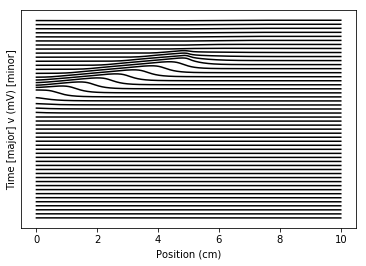

In [2]:
#HH Neuron
start_scope()

from brian2 import *

morpho = Cylinder(length=10*cm, diameter=2*238*um, n=1000, type='axon')

El = 10.613*mV
ENa = 115*mV
EK = -12*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2

# Typical equations
eqs = '''
# The same equations for the whole neuron, but possibly different parameter values
# distributed transmembrane current
Im = gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) : amp/meter**2
I : amp (point current) # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * (-v+25*mV) / (exp((-v+25*mV) / (10*mV)) - 1)/ms : Hz
betam = 4 * exp(-v/(18*mV))/ms : Hz
alphah = 0.07 * exp(-v/(20*mV))/ms : Hz
betah = 1/(exp((-v+30*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * (-v+10*mV) / (exp((-v+10*mV) / (10*mV)) - 1)/ms : Hz
betan = 0.125*exp(-v/(80*mV))/ms : Hz
gNa : siemens/meter**2
'''

neuron = SpatialNeuron(morphology=morpho, model=eqs, Cm=1*uF/cm**2,
                       Ri=35.4*ohm*cm, method="exponential_euler")
neuron.v = 0*mV
neuron.h = 1
neuron.m = 0
neuron.n = .5
neuron.I = 0
neuron.gNa = gNa0
neuron[5*cm:10*cm].gNa = 0*siemens/cm**2
M = StateMonitor(neuron, 'v', record=True)

run(50*ms, report='text')
neuron.I[0] = 1*uA  # current injection at one end
run(3*ms)
neuron.I = 0*amp
run(100*ms, report='text')
for i in range(75, 125, 1):
    plot(cumsum(neuron.length)/cm, i+(1./60)*M.v[:, i*5]/mV, 'k')
yticks([])
ylabel('Time [major] v (mV) [minor]')
xlabel('Position (cm)')
axis('tight')
show()

In [6]:
El = 10.613*mV
ENa = 115*mV
EK = -12*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2

# Typical equations
eqs = '''
# The same equations for the whole neuron, but possibly different parameter values
# distributed transmembrane current
Im = gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) : amp/meter**2
#I : amp (point current) # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * (-v+25*mV) / (exp((-v+25*mV) / (10*mV)) - 1)/ms : Hz
betam = 4 * exp(-v/(18*mV))/ms : Hz
alphah = 0.07 * exp(-v/(20*mV))/ms : Hz
betah = 1/(exp((-v+30*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * (-v+10*mV) / (exp((-v+10*mV) / (10*mV)) - 1)/ms : Hz
betan = 0.125*exp(-v/(80*mV))/ms : Hz
gNa : siemens/meter**2
'''

neuron = NeuronGroup(1, model=eqs, threshold='v > 1', reset='v = 0', refractory='15*ms', method="rk2")

neuron.v = 0*mV
neuron.h = 1
neuron.m = 0
neuron.n = .5
neuron.I = 1
neuron.gNa = gNa0

stateMonitor = StateMonitor(neuron, 'v', record=True)

run(500*ms)

plot(stateMonitor.t/ms, stateMonitor.v, label='HH-Neuron')
xlabel('Time (ms)')
ylabel('v')

AttributeError: Could not find a state variable with name "v". Did you mean to write any of the following: "h", "m", "n" ? Use the add_attribute method if you intend to add a new attribute to the object.

Starting simulation at t=0. s for a duration of 200. ms
200. ms (100%) simulated in 5s


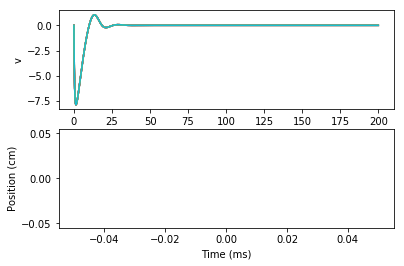

In [11]:
defaultclock.dt = 0.01*ms

morpho = Cylinder(length=10*cm, diameter=2*238*um, n=1000, type='axon')

El = 10.613*mV
ENa = 115*mV
EK = -12*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2

# Typical equations
eqs = '''
# The same equations for the whole neuron, but possibly different parameter values
# distributed transmembrane current
Im = gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) : amp/meter**2
I : amp (point current) # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * (-v+25*mV) / (exp((-v+25*mV) / (10*mV)) - 1)/ms : Hz
betam = 4 * exp(-v/(18*mV))/ms : Hz
alphah = 0.07 * exp(-v/(20*mV))/ms : Hz
betah = 1/(exp((-v+30*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * (-v+10*mV) / (exp((-v+10*mV) / (10*mV)) - 1)/ms : Hz
betan = 0.125*exp(-v/(80*mV))/ms : Hz
gNa : siemens/meter**2
'''

neuron = SpatialNeuron(morphology=morpho, model=eqs, method="exponential_euler",
                       refractory="m > 0.4", threshold="m > 0.5",
                       Cm=1*uF/cm**2, Ri=35.4*ohm*cm)
neuron.v = 0*mV
neuron.h = 1
neuron.m = 0
neuron.n = .5
neuron.I = 0*amp
neuron.gNa = gNa0
M = StateMonitor(neuron, 'v', record=True)
spikes = SpikeMonitor(neuron)

run(200*ms, report='text')
neuron.I[0] = 1*uA # current injection at one end

subplot(211)
for i in range(10):
    plot(M.t/ms, M.v.T[:, i*100]/mV)
ylabel('v')
subplot(212)
plot(spikes.t/ms, spikes.i*neuron.length[0]/cm, '.k')
xlabel('Time (ms)')
ylabel('Position (cm)')
show()
